# Apply and Visualize UMAP

**Gregory Way, 2019**

We are interested in visualizing the relationship among samples according to several variables.
These variables include `batch`, `dosage`, and `cell line`.

In [1]:
import os
import numpy as np
import pandas as pd
import umap

import plotnine as gg

from pycytominer import feature_select
from pycytominer.cyto_utils import infer_cp_features

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
def process_umap(data_df):    
    # Prepare UMAP input by removing metadata columns
    metadata_cols = infer_cp_features(data_df, metadata=True)

    metadata_df = data_df.loc[:, metadata_cols]
    umap_data_df = data_df.drop(metadata_cols, axis="columns")
    
    # Apply UMAP
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)
    
    return embedding_df

In [5]:
save_file_extensions = ['.png']
data_dir = os.path.join("data", "merged")

# Three example datasets
dataset_a = ["2019_02_15_Batch1_20X", "2019_03_20_Batch2"]
dataset_b = ["2019_11_19_Batch5", "2019_11_20_Batch6", "2019_11_22_Batch7"]
dataset_c = ["2021_03_03_Batch12", "2021_03_03_Batch13"]

In [6]:
# Load and process data
file = os.path.join(data_dir, "all_merged_profiles.csv.gz")
data_df = pd.read_csv(file)

print(data_df.shape)
data_df.head()

(1857, 407)


,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,...,Nuclei_Texture_Correlation_RNA_20_00,Nuclei_Texture_Entropy_DNA_20_03,Nuclei_Texture_Entropy_RNA_20_03,Nuclei_Texture_InfoMeas1_AGP_5_00,Nuclei_Texture_InfoMeas1_DNA_10_01,Nuclei_Texture_InfoMeas1_DNA_5_02,Nuclei_Texture_InfoMeas1_ER_5_00,Nuclei_Texture_InfoMeas1_Mito_5_00,Nuclei_Texture_InfoMeas2_Mito_5_00,Nuclei_Texture_InverseDifferenceMoment_RNA_20_01
0,219973,B02,2021_03_03_Batch13,3767,2.5x10^3 cells/well,1.0,WT_parental,20210226.0,219973,48 hr,...,0.289131,-1.728045,-0.100393,1.121394,-0.022202,1.531376,1.331481,-3.104090,2.279966,-0.624593
1,219973,B03,2021_03_03_Batch13,1998,2.5x10^3 cells/well,2.0,CloneA,20210226.0,219973,48 hr,...,0.436948,-0.646330,1.004583,0.457522,1.972381,-0.054827,0.444680,0.815532,-0.047137,0.405071
2,219973,B04,2021_03_03_Batch13,1892,2.5x10^3 cells/well,3.0,Clone E,20210226.0,219973,48 hr,...,1.157071,-1.564313,-1.669906,0.251932,2.174847,-0.073711,0.604467,1.677229,-1.687651,2.476248
3,219973,B05,2021_03_03_Batch13,3392,2.5x10^3 cells/well,4.0,WT clone 01,20210226.0,219973,48 hr,...,0.295590,-1.252088,-0.779466,1.952128,1.474118,0.968177,0.491561,-0.171471,-0.077082,1.196919
4,219973,B06,2021_03_03_Batch13,3203,2.5x10^3 cells/well,5.0,WT clone 02,20210226.0,219973,48 hr,...,0.363286,-0.194208,0.118434,0.721196,-0.092052,0.396447,0.715941,0.139263,-0.163614,-0.141617


In [7]:
data_df.Metadata_batch.value_counts()

2020_09_08_Batch10       480
2020_08_24_Batch9        360
2020_07_02_Batch8        240
2019_11_20_Batch6        120
2019_11_22_Batch7        120
2019_11_11_Batch4        120
2019_06_25_Batch3        105
2021_02_08_Batch11        60
2021_03_03_Batch12        60
2019_11_19_Batch5         60
2021_03_03_Batch13        60
2019_02_15_Batch1_20X     36
2019_03_20_Batch2         36
Name: Metadata_batch, dtype: int64

## The dataset with DMSO treated only

Four clones, clone A/E, and WT Parental lines.

In [8]:
dmso_data_df = data_df.query("Metadata_batch in @dataset_c").reset_index(drop=True)

embedding_df = process_umap(dmso_data_df)
embedding_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,6.308006,11.892334,219973,B02,2021_03_03_Batch13,3767,2.5x10^3 cells/well,1.0,WT_parental,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
1,9.900773,14.093552,219973,B03,2021_03_03_Batch13,1998,2.5x10^3 cells/well,2.0,CloneA,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
2,9.051419,14.504406,219973,B04,2021_03_03_Batch13,1892,2.5x10^3 cells/well,3.0,Clone E,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
3,8.661436,14.030704,219973,B05,2021_03_03_Batch13,3392,2.5x10^3 cells/well,4.0,WT clone 01,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
4,7.524515,11.835543,219973,B06,2021_03_03_Batch13,3203,2.5x10^3 cells/well,5.0,WT clone 02,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


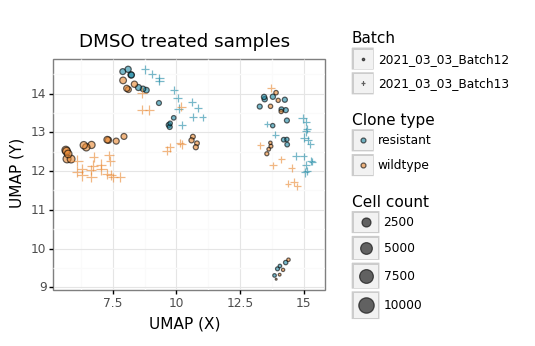

<ggplot: (-9223372036536079893)>

In [9]:
dataset = "dmso_treated"

umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_batch", size="Metadata_cell_count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO treated samples")
    + gg.scale_shape_manual(name="Batch", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone type", values=["#1F8AA5", "#E98831"])
    + gg.scale_size_continuous(name="Cell count")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_resistant_type")

for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))


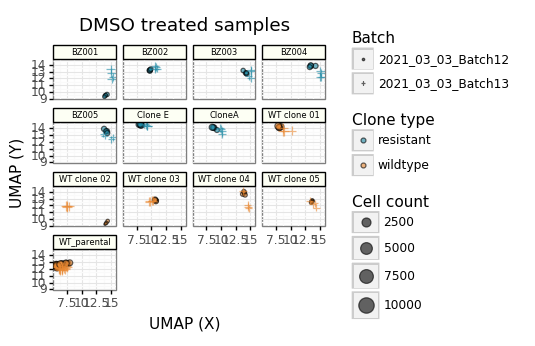

<ggplot: (-9223372036536002258)>

In [10]:
umap_clone_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_batch", size="Metadata_cell_count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO treated samples")
    + gg.scale_shape_manual(name="Batch", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone type", values=["#1F8AA5", "#E98831"])
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.scale_size_continuous(name="Cell count")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_facet_clone_sample")

for extension in save_file_extensions:
    umap_clone_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_clone_gg

## For Combined Batches of Four WT + Resistant Clones

In [11]:
fourclone_data_df = data_df.query("Metadata_batch in @dataset_b").reset_index(drop=True)

embedding_df = process_umap(fourclone_data_df)
embedding_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,9.270138,10.305564,217760,B02,2019_11_20_Batch6,28210,NaN,NaN,BZ017,NaN,217760,NaN,0.1% DMSO,NaN,NaN,resistant
1,9.013155,10.870130,217760,B03,2019_11_20_Batch6,29215,NaN,NaN,WT002,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
2,8.771379,10.847474,217760,B04,2019_11_20_Batch6,31138,NaN,NaN,WT008,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
3,11.681623,9.992533,217760,B05,2019_11_20_Batch6,23325,NaN,NaN,WT009,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
4,8.977614,9.930581,217760,B06,2019_11_20_Batch6,29598,NaN,NaN,BZ018,NaN,217760,NaN,0.1% DMSO,NaN,NaN,resistant


## Visualize a Series of UMAP Representations

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


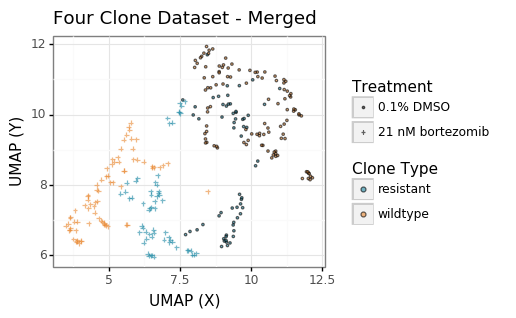

<ggplot: (317659063)>

In [12]:
umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_treatment"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone Type", values=["#1F8AA5", "#E98831"])
)

file = os.path.join("figures", "umap", "four_clone_umap_resistant_type")
for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_cell_count.png
  warn('Filename: {}'.format(filename))


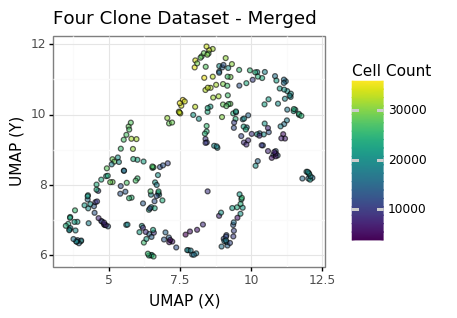

<ggplot: (-9223372036537116279)>

In [13]:
umap_cell_count_gg = (
    gg.ggplot(
        embedding_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_cell_count")
for extension in save_file_extensions:
    umap_cell_count_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)
    
umap_cell_count_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_batch.png
  warn('Filename: {}'.format(filename))


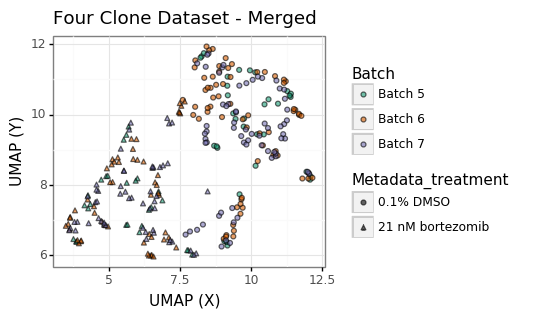

<ggplot: (323362017)>

In [14]:
umap_batch_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
)

file = os.path.join("figures", "umap", "four_clone_umap_batch")
for extension in save_file_extensions:
    umap_batch_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_plate_facet.png
  warn('Filename: {}'.format(filename))


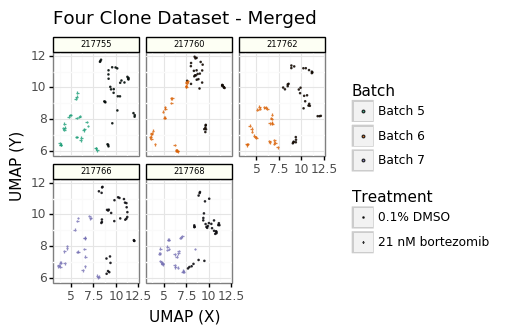

<ggplot: (-9223372036537376915)>

In [15]:
umap_batch_facet_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
     + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.8,
        size=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.facet_wrap("~Metadata_Plate")
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_plate_facet")
for extension in save_file_extensions:
    umap_batch_facet_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4.5 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))


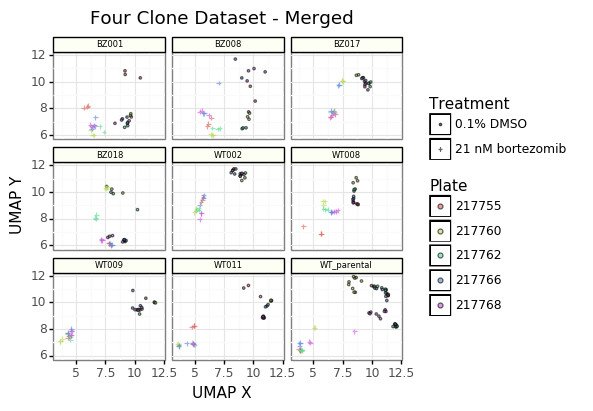

<ggplot: (318086320)>

In [16]:
# Visualize UMAP results
clone_facet_gg = (
    gg.ggplot(embedding_df, gg.aes('x', 'y'))
    + gg.geom_point(
        gg.aes(fill='factor(Metadata_Plate)', shape="Metadata_treatment"),
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Plate")
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_facet_clone_sample")
for extension in save_file_extensions:
    clone_facet_gg.save(filename='{}{}'.format(file, extension), height=4, width=4.5, dpi=400)

clone_facet_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_clone_sample.png
  warn('Filename: {}'.format(filename))


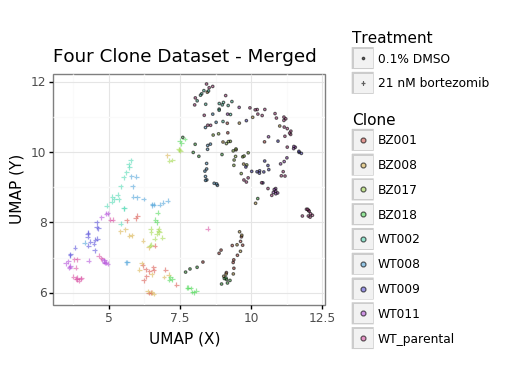

<ggplot: (-9223372036536707931)>

In [17]:
umap_well_embedding_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_number", shape="Metadata_treatment"),
        color='black', alpha=0.6
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Clone")
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_clone_sample")
for extension in save_file_extensions:
    umap_well_embedding_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_well_embedding_gg

## For Clone A and E Data

In [18]:
# Load and process data
cloneAE_data_df = data_df.query("Metadata_batch in @dataset_a").reset_index(drop=True)

embedding_cloneAE_df = process_umap(cloneAE_data_df)
embedding_cloneAE_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,0.908320,6.492369,207106_exposure320,B02,2019_03_20_Batch2,7616,NaN,NaN,WT_parental,NaN,PlateMap_207106_exposure320,NaN,0.1% DMSO,NaN,NaN,wildtype
1,0.774763,6.212831,207106_exposure320,B03,2019_03_20_Batch2,7316,NaN,NaN,WT_parental,NaN,PlateMap_207106_exposure320,NaN,0.1% DMSO,NaN,NaN,wildtype
2,0.791075,6.346101,207106_exposure320,B04,2019_03_20_Batch2,7082,NaN,NaN,WT_parental,NaN,PlateMap_207106_exposure320,NaN,0.1% DMSO,NaN,NaN,wildtype
3,3.643017,3.604681,207106_exposure320,B05,2019_03_20_Batch2,11872,NaN,NaN,CloneA,NaN,PlateMap_207106_exposure320,NaN,0.1% DMSO,NaN,NaN,resistant
4,3.519596,3.488580,207106_exposure320,B06,2019_03_20_Batch2,7898,NaN,NaN,CloneA,NaN,PlateMap_207106_exposure320,NaN,0.1% DMSO,NaN,NaN,resistant


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap.png
  warn('Filename: {}'.format(filename))


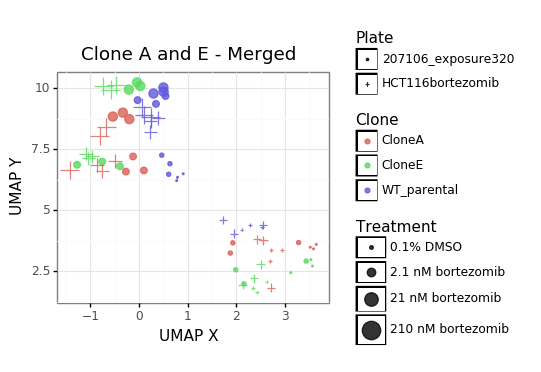

<ggplot: (-9223372036537182141)>

In [19]:
# Visualize UMAP results
clone_ae_umap_gg = (
    gg.ggplot(embedding_cloneAE_df)
    + gg.geom_point(
        gg.aes('x', 'y',
               shape="Metadata_Plate", 
               size='Metadata_treatment',
               color="Metadata_clone_number"),
        alpha=0.8
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Plate", values=[".", "+"])
    + gg.scale_color_discrete(name="Clone")
    + gg.scale_size_manual(name="Treatment", values=[1, 3, 5, 7])
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.ggtitle("Clone A and E - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)

file = os.path.join("figures", "umap", "cloneAE_umap")
for extension in save_file_extensions:
    clone_ae_umap_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )

clone_ae_umap_gg

/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/cloneAE_umap_cell_count.png
  warn('Filename: {}'.format(filename))


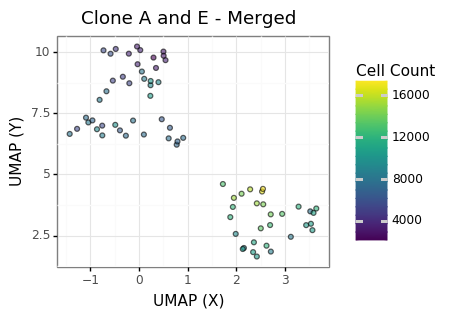

<ggplot: (-9223372036534629148)>

In [20]:
clone_ae_umap_cell_count_gg = (
    gg.ggplot(
        embedding_cloneAE_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Clone A and E - Merged")
)

file = os.path.join("figures", "umap", "cloneAE_umap_cell_count")
for extension in save_file_extensions:
    clone_ae_umap_cell_count_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )
    
clone_ae_umap_cell_count_gg

## All Data

In [21]:
embedding_combined_df = process_umap(data_df)
embedding_combined_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,11.049953,11.892057,219973,B02,2021_03_03_Batch13,3767,2.5x10^3 cells/well,1.0,WT_parental,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
1,7.945345,11.936512,219973,B03,2021_03_03_Batch13,1998,2.5x10^3 cells/well,2.0,CloneA,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
2,8.740044,13.079561,219973,B04,2021_03_03_Batch13,1892,2.5x10^3 cells/well,3.0,Clone E,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
3,9.065184,13.048712,219973,B05,2021_03_03_Batch13,3392,2.5x10^3 cells/well,4.0,WT clone 01,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
4,11.158139,11.229737,219973,B06,2021_03_03_Batch13,3203,2.5x10^3 cells/well,5.0,WT clone 02,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5.25 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/clone_compare_batch_effect.png
  warn('Filename: {}'.format(filename))


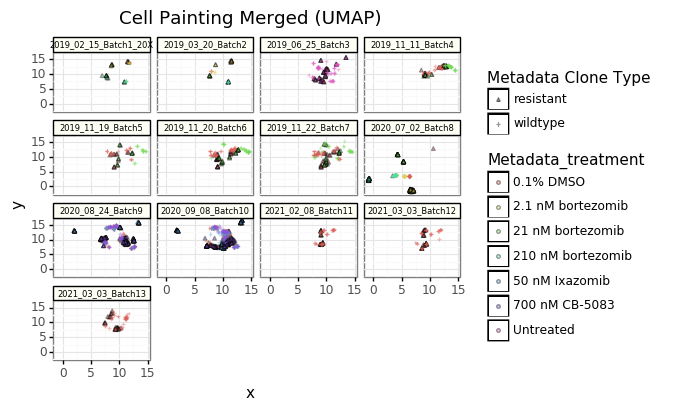

<ggplot: (-9223372036533633550)>

In [22]:
# Visualize UMAP results
merged_umap_gg = (
    gg.ggplot(embedding_combined_df)
    + gg.geom_point(
        gg.aes(
            'x', 'y',
            fill="Metadata_treatment",
            shape='Metadata_clone_type'
        ),
        size=1,
        alpha=0.4
    )
    + gg.theme_bw()
    + gg.xlab("x")
    + gg.ylab("y")
    + gg.scale_shape_manual(name="Metadata Clone Type", values=["^", "+"])
    + gg.facet_wrap("~Metadata_batch")
    + gg.ggtitle("Cell Painting Merged (UMAP)")
    + gg.theme(
            legend_key=gg.element_rect(color="black", fill = "white"),
            strip_text=gg.element_text(size=6, color="black"),
            strip_background=gg.element_rect(colour="black", fill="#fdfff4")
        )
)

file = os.path.join("figures", "umap", "clone_compare_batch_effect")
for extension in save_file_extensions:
    merged_umap_gg.save(filename='{}{}'.format(file, extension), height=4, width=5.25, dpi=400)

merged_umap_gg